In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os
import glob
import random
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.models import Model
from sklearn import preprocessing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D

In [2]:
def read_images_from_dir(directory):
    images = []
    for folder in folder_names:
        folder_path = os.path.join(directory, folder)
        print(folder_path)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            print(image_path)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not read image file {image_path}")
                continue
            print(image.shape)
            image = cv2.resize(image, (96, 96))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
            images.append((image, int(folder)))  # Store the image and its class label (0 or 1) as a tuple
    return images

In [3]:
class_names = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning' , 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
folder_names = ["0",     "1",      "2",     "3",    "4",      "5",        "6",      "7",      "8",      "9",      "10" ] 

In [48]:
all_data = read_images_from_dir('dataset')

dataset\0
dataset\0\2208.jpg
(675, 950, 3)
dataset\0\2209.jpg
(578, 871, 3)
dataset\0\2210.jpg
(564, 806, 3)
dataset\0\2211.jpg
(797, 1200, 3)
dataset\0\2212.jpg
(592, 947, 3)
dataset\0\2213.jpg
(411, 500, 3)
dataset\0\2214.jpg
(518, 777, 3)
dataset\0\2215.jpg
(500, 800, 3)
dataset\0\2216.jpg
(750, 500, 3)
dataset\0\2217.jpg
(500, 752, 3)
dataset\0\2218.jpg
(516, 688, 3)
dataset\0\2219.jpg
(266, 400, 3)
dataset\0\2220.jpg
(540, 720, 3)
dataset\0\2221.jpg
(700, 1000, 3)
dataset\0\2222.jpg
(398, 650, 3)
dataset\0\2223.jpg
(348, 400, 3)
dataset\0\2224.jpg
(678, 1024, 3)
dataset\0\2225.jpg
(94, 150, 3)
dataset\0\2226.jpg
(848, 1024, 3)
dataset\0\2227.jpg
(266, 400, 3)
dataset\0\2228.jpg
(682, 1024, 3)
dataset\0\2229.jpg
(534, 801, 3)
dataset\0\2230.jpg
(464, 800, 3)
dataset\0\2231.jpg
(160, 240, 3)
dataset\0\2232.jpg
(199, 300, 3)
dataset\0\2233.jpg
(1168, 1200, 3)
dataset\0\2234.jpg
(304, 510, 3)
dataset\0\2235.jpg
(400, 266, 3)
dataset\0\2236.jpg
(313, 500, 3)
dataset\0\2237.jpg
(683, 10

(768, 1024, 3)
dataset\0\2455.jpg
(625, 1024, 3)
dataset\0\2456.jpg
(900, 1200, 3)
dataset\0\2457.jpg
(804, 1200, 3)
dataset\0\2458.jpg
(1041, 1280, 3)
dataset\0\2459.jpg
(768, 1024, 3)
dataset\0\2460.jpg
(298, 400, 3)
dataset\0\2461.jpg
(320, 400, 3)
dataset\0\2462.jpg
(266, 400, 3)
dataset\0\2463.jpg
(680, 1024, 3)
dataset\0\2464.jpg
(313, 400, 3)
dataset\0\2465.jpg
(266, 400, 3)
dataset\0\2466.jpg
(229, 400, 3)
dataset\0\2467.jpg
(640, 1024, 3)
dataset\0\2468.jpg
(250, 400, 3)
dataset\0\2469.jpg
(299, 400, 3)
dataset\0\2470.jpg
(768, 1024, 3)
dataset\0\2471.jpg
(1024, 768, 3)
dataset\0\2472.jpg
(987, 656, 3)
dataset\0\2473.jpg
(400, 314, 3)
dataset\0\2474.jpg
(266, 400, 3)
dataset\0\2475.jpg
(266, 400, 3)
dataset\0\2476.jpg
(622, 1024, 3)
dataset\0\2477.jpg
(154, 205, 3)
dataset\0\2478.jpg
(266, 400, 3)
dataset\0\2479.jpg
(300, 400, 3)
dataset\0\2480.jpg
(582, 1024, 3)
dataset\0\2481.jpg
(768, 1024, 3)
dataset\0\2482.jpg
(1080, 1920, 3)
dataset\0\2483.jpg
(341, 400, 3)
dataset\0\248

(1200, 1020, 3)
dataset\0\2707.jpg
(250, 400, 3)
dataset\0\2708.jpg
(834, 1280, 3)
dataset\0\2709.jpg
(300, 400, 3)
dataset\0\2710.jpg
(681, 1024, 3)
dataset\0\2711.jpg
(266, 400, 3)
dataset\0\2712.jpg
(1000, 863, 3)
dataset\0\2713.jpg
(683, 1024, 3)
dataset\0\2714.jpg
(768, 1024, 3)
dataset\0\2715.jpg
(492, 720, 3)
dataset\0\2716.jpg
(1200, 1193, 3)
dataset\0\2717.jpg
(250, 400, 3)
dataset\0\2718.jpg
(768, 1024, 3)
dataset\0\2719.jpg
(266, 400, 3)
dataset\0\2720.jpg
(1036, 720, 3)
dataset\0\2721.jpg
(267, 400, 3)
dataset\0\2722.jpg
(640, 1024, 3)
dataset\0\2723.jpg
(1200, 801, 3)
dataset\0\2724.jpg
(400, 300, 3)
dataset\0\2725.jpg
(681, 1024, 3)
dataset\0\2726.jpg
(400, 400, 3)
dataset\0\2727.jpg
(250, 400, 3)
dataset\0\2728.jpg
(695, 1024, 3)
dataset\0\2729.jpg
(800, 1200, 3)
dataset\0\2730.jpg
(263, 400, 3)
dataset\0\2731.jpg
(400, 400, 3)
dataset\0\2732.jpg
(300, 400, 3)
dataset\0\2733.jpg
(340, 400, 3)
dataset\0\2734.jpg
(681, 1023, 3)
dataset\0\2735.jpg
(833, 500, 3)
dataset\0\27

(366, 550, 3)
dataset\1\4139.jpg
(282, 400, 3)
dataset\1\4140.jpg
(266, 400, 3)
dataset\1\4141.jpg
(1365, 2048, 3)
dataset\1\4142.jpg
(240, 403, 3)
dataset\1\4143.jpg
(265, 400, 3)
dataset\1\4144.jpg
(373, 600, 3)
dataset\1\4145.jpg
(268, 400, 3)
dataset\1\4146.jpg
(364, 496, 3)
dataset\1\4147.jpg
(300, 400, 3)
dataset\1\4148.jpg
(267, 400, 3)
dataset\1\4149.jpg
(274, 458, 3)
dataset\1\4150.jpg
(233, 350, 3)
dataset\1\4151.jpg
(266, 400, 3)
dataset\1\4152.jpg
(256, 400, 3)
dataset\1\4153.jpg
(261, 400, 3)
dataset\1\4154.jpg
(265, 400, 3)
dataset\1\4155.jpg
(235, 350, 3)
dataset\1\4156.jpg
(255, 400, 3)
dataset\1\4157.jpg
(265, 400, 3)
dataset\1\4158.jpg
(240, 397, 3)
dataset\1\4159.jpg
(214, 320, 3)
dataset\1\4160.jpg
(374, 550, 3)
dataset\1\4161.jpg
(240, 424, 3)
dataset\1\4162.jpg
(400, 298, 3)
dataset\1\4163.jpg
(266, 400, 3)
dataset\1\4164.jpg
(300, 400, 3)
dataset\1\4165.jpg
(267, 400, 3)
dataset\1\4166.jpg
(224, 400, 3)
dataset\1\4167.jpg
(304, 475, 3)
dataset\1\4168.jpg
(264, 40

(413, 700, 3)
dataset\1\4451.jpg
(250, 400, 3)
dataset\1\4452.jpg
(240, 444, 3)
dataset\1\4453.jpg
(400, 280, 3)
dataset\1\4454.jpg
(240, 436, 3)
dataset\1\4455.jpg
(833, 1280, 3)
dataset\1\4456.jpg
(400, 600, 3)
dataset\1\4457.jpg
(273, 400, 3)
dataset\1\4458.jpg
(265, 384, 3)
dataset\1\4459.jpg
(266, 400, 3)
dataset\1\4460.jpg
(300, 400, 3)
dataset\1\4461.jpg
(267, 400, 3)
dataset\1\4462.jpg
(266, 400, 3)
dataset\1\4463.jpg
(266, 400, 3)
dataset\1\4464.jpg
(240, 426, 3)
dataset\1\4465.jpg
(253, 400, 3)
dataset\1\4466.jpg
(300, 400, 3)
dataset\1\4467.jpg
(266, 400, 3)
dataset\1\4468.jpg
(268, 400, 3)
dataset\1\4469.jpg
(266, 400, 3)
dataset\1\4470.jpg
(240, 426, 3)
dataset\1\4471.jpg
(800, 1200, 3)
dataset\1\4472.jpg
(266, 400, 3)
dataset\1\4473.jpg
(351, 620, 3)
dataset\1\4474.jpg
(266, 400, 3)
dataset\1\4475.jpg
(240, 441, 3)
dataset\1\4476.jpg
(1416, 2130, 3)
dataset\1\4477.jpg
(240, 400, 3)
dataset\1\4478.jpg
(266, 400, 3)
dataset\1\4479.jpg
(270, 400, 3)
dataset\1\4480.jpg
(270, 

(1080, 1920, 3)
dataset\1\4698.jpg
(266, 400, 3)
dataset\1\4699.jpg
(626, 940, 3)
dataset\1\4700.jpg
(340, 940, 3)
dataset\1\4701.jpg
(675, 1200, 3)
dataset\1\4702.jpg
(421, 800, 3)
dataset\1\4703.jpg
(1080, 1920, 3)
dataset\1\4704.jpg
(280, 400, 3)
dataset\1\4705.jpg
(240, 426, 3)
dataset\1\4706.jpg
(240, 410, 3)
dataset\1\4707.jpg
(299, 400, 3)
dataset\1\4708.jpg
(240, 357, 3)
dataset\1\4709.jpg
(279, 400, 3)
dataset\1\4710.jpg
(240, 403, 3)
dataset\1\4711.jpg
(240, 426, 3)
dataset\1\4712.jpg
(299, 474, 3)
dataset\1\4713.jpg
(266, 400, 3)
dataset\1\4714.jpg
(280, 500, 3)
dataset\1\4715.jpg
(253, 400, 3)
dataset\1\4716.jpg
(308, 487, 3)
dataset\1\4717.jpg
(266, 400, 3)
dataset\1\4718.jpg
(266, 400, 3)
dataset\1\4719.jpg
(316, 400, 3)
dataset\1\4720.jpg
(307, 550, 3)
dataset\1\4721.jpg
(240, 385, 3)
dataset\1\4722.jpg
(240, 390, 3)
dataset\1\4723.jpg
(273, 400, 3)
dataset\1\4724.jpg
(1080, 1920, 3)
dataset\1\4725.jpg
(295, 550, 3)
dataset\1\4726.jpg
(800, 1200, 3)
dataset\1\4727.jpg
(2

(2112, 2816, 3)
dataset\2\3623.jpg
(300, 600, 3)
dataset\2\3624.jpg
(508, 677, 3)
dataset\2\3625.jpg
(768, 1024, 3)
dataset\2\3626.jpg
(559, 746, 3)
dataset\2\3627.jpg
(768, 1024, 3)
dataset\2\3628.jpg
(759, 628, 3)
dataset\2\3629.jpg
(1536, 2048, 3)
dataset\2\3630.jpg
(664, 1000, 3)
dataset\2\3631.jpg
(385, 550, 3)
dataset\2\3632.jpg
(266, 400, 3)
dataset\2\3633.jpg
(960, 1200, 3)
dataset\2\3634.jpg
(370, 400, 3)
dataset\2\3635.jpg
(369, 365, 3)
dataset\2\3636.jpg
(768, 1024, 3)
dataset\2\3637.jpg
(310, 451, 3)
dataset\2\3638.jpg
(300, 400, 3)
dataset\2\3639.jpg
(300, 400, 3)
dataset\2\3640.jpg
(588, 799, 3)
dataset\2\3641.jpg
(300, 400, 3)
dataset\2\3642.jpg
(600, 900, 3)
dataset\2\3643.jpg
(225, 300, 3)
dataset\2\3644.jpg
(299, 400, 3)
dataset\2\3645.jpg
(567, 756, 3)
dataset\2\3646.jpg
(267, 400, 3)
dataset\2\3647.jpg
(278, 400, 3)
dataset\2\3648.jpg
(320, 480, 3)
dataset\2\3649.jpg
(300, 400, 3)
dataset\2\3650.jpg
(700, 1120, 3)
dataset\2\3651.jpg
(1024, 683, 3)
dataset\2\3652.jpg

(471, 700, 3)
dataset\2\3871.jpg
(500, 900, 3)
dataset\2\3872.jpg
(859, 1292, 3)
dataset\2\3873.jpg
(604, 902, 3)
dataset\2\3874.jpg
(266, 400, 3)
dataset\2\3875.jpg
(597, 1200, 3)
dataset\2\3876.jpg
(2448, 3264, 3)
dataset\2\3877.jpg
(366, 550, 3)
dataset\2\3878.jpg
(453, 600, 3)
dataset\2\3879.jpg
(375, 500, 3)
dataset\2\3880.jpg
(514, 771, 3)
dataset\2\3881.jpg
(334, 500, 3)
dataset\2\3882.jpg
(333, 500, 3)
dataset\2\3883.jpg
(1024, 1280, 3)
dataset\2\3884.jpg
(1000, 662, 3)
dataset\2\3885.jpg
(533, 750, 3)
dataset\2\3886.jpg
(562, 785, 3)
dataset\2\3887.jpg
(300, 533, 3)
dataset\2\3888.jpg
(596, 905, 3)
dataset\2\3889.jpg
(850, 1332, 3)
dataset\2\3890.jpg
(1024, 1024, 3)
dataset\2\3891.jpg
(420, 600, 3)
dataset\2\3892.jpg
(2027, 3951, 3)
dataset\2\3893.jpg
(600, 800, 3)
dataset\2\3894.jpg
(681, 1024, 3)
dataset\2\3895.jpg
(733, 1200, 3)
dataset\2\3896.jpg
(536, 750, 3)
dataset\2\3897.jpg
(1080, 1920, 3)
dataset\2\3898.jpg
(515, 686, 3)
dataset\2\3899.jpg
(1280, 1440, 3)
dataset\2\3

(240, 401, 3)
dataset\3\6141.jpg
(264, 400, 3)
dataset\3\6142.jpg
(266, 400, 3)
dataset\3\6143.jpg
(251, 400, 3)
dataset\3\6144.jpg
(240, 458, 3)
dataset\3\6145.jpg
(300, 400, 3)
dataset\3\6146.jpg
(240, 400, 3)
dataset\3\6147.jpg
(400, 300, 3)
dataset\3\6148.jpg
(400, 300, 3)
dataset\3\6149.jpg
(266, 400, 3)
dataset\3\6150.jpg
(266, 400, 3)
dataset\3\6151.jpg
(266, 400, 3)
dataset\3\6152.jpg
(281, 400, 3)
dataset\3\6153.jpg
(308, 400, 3)
dataset\3\6154.jpg
(266, 400, 3)
dataset\3\6155.jpg
(400, 300, 3)
dataset\3\6156.jpg
(240, 400, 3)
dataset\3\6157.jpg
(300, 400, 3)
dataset\3\6158.jpg
(266, 400, 3)
dataset\3\6159.jpg
(400, 300, 3)
dataset\3\6160.jpg
(288, 400, 3)
dataset\3\6161.jpg
(303, 400, 3)
dataset\3\6162.jpg
(283, 400, 3)
dataset\3\6163.jpg
(400, 309, 3)
dataset\3\6164.jpg
(240, 400, 3)
dataset\3\6165.jpg
(300, 400, 3)
dataset\3\6166.jpg
(400, 300, 3)
dataset\3\6167.jpg
(299, 400, 3)
dataset\3\6168.jpg
(400, 340, 3)
dataset\3\6169.jpg
(266, 400, 3)
dataset\3\6170.jpg
(265, 189,

(266, 400, 3)
dataset\3\6396.jpg
(266, 400, 3)
dataset\3\6397.jpg
(558, 800, 3)
dataset\3\6398.jpg
(363, 550, 3)
dataset\3\6399.jpg
(400, 266, 3)
dataset\3\6400.jpg
(400, 300, 3)
dataset\3\6401.jpg
(400, 280, 3)
dataset\3\6402.jpg
(400, 300, 3)
dataset\3\6403.jpg
(240, 427, 3)
dataset\3\6404.jpg
(192, 390, 3)
dataset\3\6405.jpg
(266, 400, 3)
dataset\3\6406.jpg
(400, 266, 3)
dataset\3\6407.jpg
(400, 390, 3)
dataset\3\6408.jpg
(284, 400, 3)
dataset\3\6409.jpg
(400, 266, 3)
dataset\3\6410.jpg
(175, 220, 3)
dataset\3\6411.jpg
(266, 400, 3)
dataset\3\6412.jpg
(240, 406, 3)
dataset\3\6413.jpg
(266, 400, 3)
dataset\3\6414.jpg
(266, 400, 3)
dataset\3\6415.jpg
(400, 300, 3)
dataset\3\6416.jpg
(400, 266, 3)
dataset\3\6417.jpg
(300, 400, 3)
dataset\3\6418.jpg
(400, 400, 3)
dataset\3\6419.jpg
(400, 299, 3)
dataset\3\6420.jpg
(267, 400, 3)
dataset\3\6421.jpg
(400, 270, 3)
dataset\3\6422.jpg
(140, 180, 3)
dataset\3\6423.jpg
(667, 500, 3)
dataset\3\6424.jpg
(266, 400, 3)
dataset\3\6425.jpg
(208, 312,

(400, 400, 3)
dataset\3\6649.jpg
(400, 400, 3)
dataset\3\6650.jpg
(300, 400, 3)
dataset\3\6651.jpg
(400, 400, 3)
dataset\3\6652.jpg
(240, 427, 3)
dataset\3\6653.jpg
(157, 254, 3)
dataset\3\6654.jpg
(400, 330, 3)
dataset\3\6655.jpg
(240, 400, 3)
dataset\3\6656.jpg
(280, 400, 3)
dataset\3\6657.jpg
(240, 576, 3)
dataset\3\6658.jpg
(423, 240, 3)
dataset\3\6659.jpg
(261, 400, 3)
dataset\3\6660.jpg
(300, 400, 3)
dataset\3\6661.jpg
(280, 400, 3)
dataset\3\6662.jpg
(240, 400, 3)
dataset\3\6663.jpg
(266, 400, 3)
dataset\3\6664.jpg
(266, 400, 3)
dataset\3\6665.jpg
(271, 400, 3)
dataset\3\6666.jpg
(240, 402, 3)
dataset\3\6667.jpg
(1200, 800, 3)
dataset\3\6668.jpg
(400, 300, 3)
dataset\3\6669.jpg
(240, 430, 3)
dataset\3\6670.jpg
(266, 400, 3)
dataset\3\6671.jpg
(266, 400, 3)
dataset\3\6672.jpg
(266, 400, 3)
dataset\3\6673.jpg
(208, 312, 3)
dataset\3\6674.jpg
(240, 399, 3)
dataset\3\6675.jpg
(266, 400, 3)
dataset\3\6676.jpg
(240, 427, 3)
dataset\3\6677.jpg
(240, 427, 3)
dataset\3\6678.jpg
(400, 400

(188, 268, 3)
dataset\4\0177.jpg
(194, 259, 3)
dataset\4\0178.jpg
(253, 199, 3)
dataset\4\0179.jpg
(170, 297, 3)
dataset\4\0180.jpg
(254, 199, 3)
dataset\4\0181.jpg
(183, 275, 3)
dataset\4\0182.jpg
(183, 275, 3)
dataset\4\0183.jpg
(259, 194, 3)
dataset\4\0184.jpg
(259, 194, 3)
dataset\4\0185.jpg
(221, 228, 3)
dataset\4\0186.jpg
(194, 259, 3)
dataset\4\0187.jpg
(275, 183, 3)
dataset\4\0188.jpg
(194, 259, 3)
dataset\4\0189.jpg
(194, 260, 3)
dataset\4\0190.jpg
(140, 180, 3)
dataset\4\0191.jpg
(183, 275, 3)
dataset\4\0192.jpg
(176, 286, 3)
dataset\4\0193.jpg
(259, 194, 3)
dataset\4\0194.jpg
(184, 274, 3)
dataset\4\0195.jpg
(183, 275, 3)
dataset\4\0196.jpg
(259, 194, 3)
dataset\4\0197.jpg
(183, 275, 3)
dataset\4\0198.jpg
(254, 199, 3)
dataset\4\0199.jpg
(183, 275, 3)
dataset\4\0200.jpg
(168, 299, 3)
dataset\4\0201.jpg
(231, 218, 3)
dataset\4\0202.jpg
(194, 259, 3)
dataset\4\0203.jpg
(225, 225, 3)
dataset\4\0204.jpg
(300, 168, 3)
dataset\4\0205.jpg
(194, 259, 3)
dataset\4\0206.jpg
(254, 199,

(276, 400, 3)
dataset\4\0434.jpg
(208, 300, 3)
dataset\4\0435.jpg
(300, 400, 3)
dataset\4\0436.jpg
(282, 400, 3)
dataset\4\0437.jpg
(299, 400, 3)
dataset\4\0438.jpg
(357, 400, 3)
dataset\4\0439.jpg
(400, 300, 3)
dataset\4\0440.jpg
(400, 300, 3)
dataset\4\0441.jpg
(400, 297, 3)
dataset\4\0442.jpg
(318, 400, 3)
dataset\4\0443.jpg
(256, 400, 3)
dataset\4\0444.jpg
(265, 400, 3)
dataset\4\0445.jpg
(297, 400, 3)
dataset\4\0446.jpg
(400, 300, 3)
dataset\4\0447.jpg
(300, 400, 3)
dataset\4\0448.jpg
(400, 300, 3)
dataset\4\0449.jpg
(400, 323, 3)
dataset\4\0450.jpg
(224, 300, 3)
dataset\4\0451.jpg
(401, 299, 3)
dataset\4\0452.jpg
(260, 400, 3)
dataset\4\0453.jpg
(210, 320, 3)
dataset\4\0454.jpg
(328, 450, 3)
dataset\4\0455.jpg
(400, 400, 3)
dataset\4\0456.jpg
(270, 400, 3)
dataset\4\0457.jpg
(225, 300, 3)
dataset\4\0458.jpg
(399, 550, 3)
dataset\4\0459.jpg
(342, 259, 3)
dataset\4\0460.jpg
(266, 400, 3)
dataset\4\0461.jpg
(282, 400, 3)
dataset\4\0462.jpg
(265, 400, 3)
dataset\4\0463.jpg
(399, 400,

(795, 1200, 3)
dataset\5\1942.jpg
(400, 375, 3)
dataset\5\1943.jpg
(240, 425, 3)
dataset\5\1944.jpg
(283, 400, 3)
dataset\5\1945.jpg
(317, 500, 3)
dataset\5\1946.jpg
(267, 400, 3)
dataset\5\1947.jpg
(240, 398, 3)
dataset\5\1948.jpg
(239, 440, 3)
dataset\5\1949.jpg
(300, 400, 3)
dataset\5\1950.jpg
(1469, 1595, 3)
dataset\5\1951.jpg
(300, 400, 3)
dataset\5\1952.jpg
(240, 426, 3)
dataset\5\1953.jpg
(339, 572, 3)
dataset\5\1954.jpg
(567, 1200, 3)
dataset\5\1955.jpg
(606, 1200, 3)
dataset\5\1956.jpg
(240, 397, 3)
dataset\5\1957.jpg
(240, 410, 3)
dataset\5\1958.jpg
(250, 400, 3)
dataset\5\1959.jpg
(663, 1000, 3)
dataset\5\1960.jpg
(211, 395, 3)
dataset\5\1961.jpg
(178, 400, 3)
dataset\5\1962.jpg
(166, 351, 3)
dataset\5\1963.jpg
(266, 400, 3)
dataset\5\1964.jpg
(238, 284, 3)
dataset\5\1965.jpg
(136, 204, 3)
dataset\5\1966.jpg
(400, 300, 3)
dataset\5\1967.jpg
(240, 384, 3)
dataset\5\1968.jpg
(240, 384, 3)
dataset\5\1969.jpg
(284, 382, 3)
dataset\5\1970.jpg
(240, 426, 3)
dataset\5\1971.jpg
(141

(750, 1125, 3)
dataset\6\1013.jpg
(266, 400, 3)
dataset\6\1017.jpg
(240, 435, 3)
dataset\6\102.jpg
(257, 400, 3)
dataset\6\1021.jpg
(268, 400, 3)
dataset\6\1030.jpg
(366, 550, 3)
dataset\6\1036.jpg
(240, 469, 3)
dataset\6\1038.jpg
(265, 400, 3)
dataset\6\1044.jpg
(266, 400, 3)
dataset\6\1048.jpg
(276, 400, 3)
dataset\6\105.jpg
(760, 1200, 3)
dataset\6\1051.jpg
(240, 450, 3)
dataset\6\1053.jpg
(265, 400, 3)
dataset\6\1056.jpg
(266, 400, 3)
dataset\6\1058.jpg
(240, 429, 3)
dataset\6\106.jpg
(300, 400, 3)
dataset\6\1061.jpg
(266, 400, 3)
dataset\6\1067.jpg
(240, 400, 3)
dataset\6\107.jpg
(269, 400, 3)
dataset\6\1070.jpg
(240, 388, 3)
dataset\6\1074.jpg
(266, 400, 3)
dataset\6\1075.jpg
(299, 400, 3)
dataset\6\1078.jpg
(300, 400, 3)
dataset\6\1082.jpg
(300, 400, 3)
dataset\6\1084.jpg
(264, 400, 3)
dataset\6\1088.jpg
(328, 600, 3)
dataset\6\109.jpg
(240, 422, 3)
dataset\6\1090.jpg
(257, 400, 3)
dataset\6\11.jpg
(266, 400, 3)
dataset\6\110.jpg
(266, 400, 3)
dataset\6\1101.jpg
(278, 400, 3)
da

(780, 1175, 3)
dataset\6\1554.jpg
(262, 400, 3)
dataset\6\1555.jpg
(400, 300, 3)
dataset\6\1556.jpg
(252, 400, 3)
dataset\6\1557.jpg
(266, 400, 3)
dataset\6\1558.jpg
(240, 433, 3)
dataset\6\1559.jpg
(240, 425, 3)
dataset\6\1560.jpg
(300, 400, 3)
dataset\6\1561.jpg
(288, 400, 3)
dataset\6\1562.jpg
(306, 400, 3)
dataset\6\1563.jpg
(299, 400, 3)
dataset\6\1564.jpg
(300, 400, 3)
dataset\6\1565.jpg
(1080, 1620, 3)
dataset\6\1566.jpg
(266, 400, 3)
dataset\6\1567.jpg
(240, 421, 3)
dataset\6\1568.jpg
(600, 588, 3)
dataset\6\1569.jpg
(300, 400, 3)
dataset\6\1570.jpg
(263, 400, 3)
dataset\6\1571.jpg
(691, 1000, 3)
dataset\6\1572.jpg
(240, 429, 3)
dataset\6\1573.jpg
(279, 400, 3)
dataset\6\1574.jpg
(293, 400, 3)
dataset\6\1575.jpg
(300, 400, 3)
dataset\6\1576.jpg
(300, 400, 3)
dataset\6\1577.jpg
(400, 351, 3)
dataset\6\1578.jpg
(266, 400, 3)
dataset\6\1579.jpg
(266, 400, 3)
dataset\6\1580.jpg
(269, 400, 3)
dataset\6\1581.jpg
(300, 400, 3)
dataset\6\1582.jpg
(240, 487, 3)
dataset\6\1583.jpg
(400, 

(267, 400, 3)
dataset\6\1808.jpg
(258, 400, 3)
dataset\6\1809.jpg
(299, 400, 3)
dataset\6\1810.jpg
(299, 400, 3)
dataset\6\1811.jpg
(300, 400, 3)
dataset\6\1812.jpg
(277, 400, 3)
dataset\6\1813.jpg
(266, 400, 3)
dataset\6\1814.jpg
(194, 259, 3)
dataset\6\1815.jpg
(500, 375, 3)
dataset\6\1816.jpg
(274, 400, 3)
dataset\6\1817.jpg
(253, 450, 3)
dataset\6\1818.jpg
(240, 421, 3)
dataset\6\1819.jpg
(292, 400, 3)
dataset\6\1820.jpg
(240, 413, 3)
dataset\6\1821.jpg
(853, 1280, 3)
dataset\6\1822.jpg
(300, 400, 3)
dataset\6\1823.jpg
(266, 400, 3)
dataset\6\1824.jpg
(240, 406, 3)
dataset\6\1825.jpg
(258, 400, 3)
dataset\6\1826.jpg
(294, 400, 3)
dataset\6\1827.jpg
(220, 347, 3)
dataset\6\1828.jpg
(810, 1080, 3)
dataset\7
dataset\7\0592.jpg
(554, 943, 3)
dataset\7\0593.jpg
(196, 446, 3)
dataset\7\0594.jpg
(263, 389, 3)
dataset\7\0595.jpg
(645, 938, 3)
dataset\7\0596.jpg
(237, 314, 3)
dataset\7\0598.jpg
(211, 366, 3)
dataset\7\0599.jpg
(222, 321, 3)
dataset\7\0600.jpg
(155, 314, 3)
dataset\7\0601.jp

(240, 603, 3)
dataset\7\0820.jpg
(193, 300, 3)
dataset\7\0821.jpg
(132, 266, 3)
dataset\7\0822.jpg
(403, 1015, 3)
dataset\7\0823.jpg
(478, 1014, 3)
dataset\8
dataset\8\4930.jpg
(761, 1200, 3)
dataset\8\4932.jpg
(298, 400, 3)
dataset\8\4933.jpg
(391, 538, 3)
dataset\8\4934.jpg
(266, 400, 3)
dataset\8\4935.jpg
(240, 412, 3)
dataset\8\4936.jpg
(300, 400, 3)
dataset\8\4937.jpg
(286, 400, 3)
dataset\8\4938.jpg
(266, 400, 3)
dataset\8\4939.jpg
(559, 834, 3)
dataset\8\4940.jpg
(234, 330, 3)
dataset\8\4941.jpg
(311, 400, 3)
dataset\8\4942.jpg
(300, 400, 3)
dataset\8\4943.jpg
(265, 400, 3)
dataset\8\4944.jpg
(795, 1200, 3)
dataset\8\4945.jpg
(266, 400, 3)
dataset\8\4946.jpg
(1024, 679, 3)
dataset\8\4947.jpg
(266, 400, 3)
dataset\8\4948.jpg
(266, 400, 3)
dataset\8\4949.jpg
(268, 400, 3)
dataset\8\4950.jpg
(300, 400, 3)
dataset\8\4951.jpg
(272, 400, 3)
dataset\8\4952.jpg
(209, 278, 3)
dataset\8\4953.jpg
(279, 400, 3)
dataset\8\4954.jpg
(300, 450, 3)
dataset\8\4955.jpg
(300, 400, 3)
dataset\8\4956

(229, 325, 3)
dataset\8\5185.jpg
(265, 400, 3)
dataset\8\5186.jpg
(300, 400, 3)
dataset\8\5187.jpg
(266, 400, 3)
dataset\8\5188.jpg
(244, 296, 3)
dataset\8\5189.jpg
(266, 400, 3)
dataset\8\5190.jpg
(299, 400, 3)
dataset\8\5191.jpg
(313, 236, 3)
dataset\8\5192.jpg
(277, 400, 3)
dataset\8\5193.jpg
(266, 400, 3)
dataset\8\5194.jpg
(382, 783, 3)
dataset\8\5195.jpg
(270, 400, 3)
dataset\8\5196.jpg
(254, 259, 3)
dataset\8\5197.jpg
(278, 382, 3)
dataset\8\5198.jpg
(300, 400, 3)
dataset\8\5199.jpg
(207, 276, 3)
dataset\8\5200.jpg
(266, 400, 3)
dataset\8\5201.jpg
(266, 400, 3)
dataset\8\5202.jpg
(598, 900, 3)
dataset\8\5203.jpg
(195, 302, 3)
dataset\8\5204.jpg
(163, 298, 3)
dataset\8\5205.jpg
(240, 426, 3)
dataset\8\5206.jpg
(190, 322, 3)
dataset\8\5207.jpg
(266, 400, 3)
dataset\8\5208.jpg
(300, 400, 3)
dataset\8\5209.jpg
(277, 400, 3)
dataset\8\5210.jpg
(300, 400, 3)
dataset\8\5211.jpg
(266, 400, 3)
dataset\8\5212.jpg
(240, 504, 3)
dataset\8\5213.jpg
(369, 550, 3)
dataset\8\5214.jpg
(177, 400,

(801, 1200, 3)
dataset\8\5450.jpg
(1421, 1795, 3)
dataset\8\5451.jpg
(660, 1189, 3)
dataset\8\5452.jpg
(320, 400, 3)
dataset\8\5453.jpg
(597, 900, 3)
dataset\8\5454.jpg
(268, 400, 3)
dataset\8\5455.jpg
(769, 1200, 3)
dataset\8\5456.jpg
(768, 1024, 3)
dataset\8\5457.jpg
(265, 249, 3)
dataset\8\5458.jpg
(162, 373, 3)
dataset\8\5459.jpg
(300, 400, 3)
dataset\8\5460.jpg
(300, 400, 3)
dataset\8\5461.jpg
(264, 400, 3)
dataset\8\5462.jpg
(1787, 2746, 3)
dataset\8\5463.jpg
(673, 702, 3)
dataset\8\5464.jpg
(400, 300, 3)
dataset\8\5465.jpg
(330, 688, 3)
dataset\8\5466.jpg
(803, 1200, 3)
dataset\8\5467.jpg
(268, 400, 3)
dataset\8\5468.jpg
(266, 400, 3)
dataset\8\5469.jpg
(400, 312, 3)
dataset\8\5470.jpg
(400, 300, 3)
dataset\8\5471.jpg
(347, 400, 3)
dataset\8\5472.jpg
(398, 640, 3)
dataset\8\5473.jpg
(266, 400, 3)
dataset\8\5474.jpg
(476, 515, 3)
dataset\8\5475.jpg
(128, 388, 3)
dataset\8\5476.jpg
(258, 397, 3)
dataset\8\5477.jpg
(264, 400, 3)
dataset\8\5478.jpg
(280, 400, 3)
dataset\8\5479.jpg
(

(266, 400, 3)
dataset\8\5701.jpg
(267, 400, 3)
dataset\8\5702.jpg
(267, 400, 3)
dataset\8\5703.jpg
(220, 450, 3)
dataset\8\5704.jpg
(683, 1024, 3)
dataset\8\5705.jpg
(264, 400, 3)
dataset\8\5706.jpg
(284, 984, 3)
dataset\8\5707.jpg
(148, 389, 3)
dataset\8\5708.jpg
(150, 467, 3)
dataset\8\5709.jpg
(198, 356, 3)
dataset\8\5710.jpg
(433, 645, 3)
dataset\8\5711.jpg
(303, 400, 3)
dataset\8\5712.jpg
(426, 240, 3)
dataset\8\5713.jpg
(266, 400, 3)
dataset\8\5714.jpg
(283, 353, 3)
dataset\8\5715.jpg
(289, 295, 3)
dataset\8\5716.jpg
(400, 400, 3)
dataset\8\5717.jpg
(640, 1024, 3)
dataset\8\5718.jpg
(300, 400, 3)
dataset\8\5719.jpg
(147, 304, 3)
dataset\8\5720.jpg
(257, 400, 3)
dataset\8\5721.jpg
(309, 400, 3)
dataset\8\5722.jpg
(266, 400, 3)
dataset\8\5723.jpg
(240, 475, 3)
dataset\8\5724.jpg
(240, 426, 3)
dataset\8\5725.jpg
(265, 400, 3)
dataset\8\5726.jpg
(400, 300, 3)
dataset\8\5727.jpg
(300, 400, 3)
dataset\8\5728.jpg
(299, 400, 3)
dataset\8\5729.jpg
(240, 426, 3)
dataset\8\5730.jpg
(260, 40

(636, 1024, 3)
dataset\8\5964.jpg
(300, 400, 3)
dataset\8\5965.jpg
(129, 323, 3)
dataset\8\5966.jpg
(685, 1024, 3)
dataset\8\5967.jpg
(533, 800, 3)
dataset\8\5968.jpg
(300, 400, 3)
dataset\8\5969.jpg
(282, 400, 3)
dataset\8\5970.jpg
(266, 400, 3)
dataset\8\5971.jpg
(800, 1200, 3)
dataset\8\5972.jpg
(300, 400, 3)
dataset\8\5973.jpg
(300, 400, 3)
dataset\8\5974.jpg
(266, 400, 3)
dataset\8\5975.jpg
(264, 400, 3)
dataset\8\5976.jpg
(240, 442, 3)
dataset\8\5977.jpg
(300, 400, 3)
dataset\8\5978.jpg
(264, 400, 3)
dataset\8\5979.jpg
(267, 400, 3)
dataset\8\5980.jpg
(266, 400, 3)
dataset\8\5981.jpg
(252, 400, 3)
dataset\8\5982.jpg
(400, 268, 3)
dataset\8\5983.jpg
(266, 400, 3)
dataset\8\5984.jpg
(1734, 2957, 3)
dataset\8\5985.jpg
(427, 640, 3)
dataset\8\5986.jpg
(266, 400, 3)
dataset\8\5987.jpg
(504, 662, 3)
dataset\8\5988.jpg
(266, 400, 3)
dataset\8\5989.jpg
(269, 400, 3)
dataset\8\5990.jpg
(400, 285, 3)
dataset\8\5991.jpg
(191, 316, 3)
dataset\8\5992.jpg
(920, 1104, 3)
dataset\8\5993.jpg
(310

(268, 400, 3)
dataset\9\3037.jpg
(278, 286, 3)
dataset\9\3038.jpg
(175, 368, 3)
dataset\9\3039.jpg
(266, 400, 3)
dataset\9\3040.jpg
(266, 400, 3)
dataset\9\3041.jpg
(189, 388, 3)
dataset\9\3042.jpg
(400, 266, 3)
dataset\9\3043.jpg
(197, 360, 3)
dataset\9\3044.jpg
(265, 400, 3)
dataset\9\3045.jpg
(384, 500, 3)
dataset\9\3046.jpg
(268, 400, 3)
dataset\9\3047.jpg
(269, 400, 3)
dataset\9\3048.jpg
(300, 450, 3)
dataset\9\3049.jpg
(324, 400, 3)
dataset\9\3050.jpg
(250, 400, 3)
dataset\9\3051.jpg
(503, 831, 3)
dataset\9\3052.jpg
(240, 391, 3)
dataset\9\3053.jpg
(263, 375, 3)
dataset\9\3054.jpg
(266, 400, 3)
dataset\9\3055.jpg
(284, 418, 3)
dataset\9\3056.jpg
(255, 400, 3)
dataset\9\3057.jpg
(600, 800, 3)
dataset\9\3058.jpg
(234, 292, 3)
dataset\9\3059.jpg
(264, 400, 3)
dataset\9\3060.jpg
(265, 400, 3)
dataset\9\3061.jpg
(264, 400, 3)
dataset\9\3062.jpg
(218, 358, 3)
dataset\9\3063.jpg
(217, 273, 3)
dataset\9\3064.jpg
(256, 400, 3)
dataset\9\3065.jpg
(591, 800, 3)
dataset\9\3066.jpg
(266, 400,

(800, 1200, 3)
dataset\9\3285.jpg
(227, 336, 3)
dataset\9\3286.jpg
(195, 317, 3)
dataset\9\3287.jpg
(551, 1010, 3)
dataset\9\3288.jpg
(378, 400, 3)
dataset\9\3289.jpg
(240, 426, 3)
dataset\9\3290.jpg
(259, 400, 3)
dataset\9\3291.jpg
(259, 400, 3)
dataset\9\3292.jpg
(320, 400, 3)
dataset\9\3293.jpg
(265, 400, 3)
dataset\9\3294.jpg
(281, 400, 3)
dataset\9\3295.jpg
(220, 375, 3)
dataset\9\3296.jpg
(452, 733, 3)
dataset\9\3297.jpg
(210, 323, 3)
dataset\9\3298.jpg
(195, 359, 3)
dataset\9\3299.jpg
(240, 426, 3)
dataset\9\3300.jpg
(188, 389, 3)
dataset\9\3301.jpg
(799, 1200, 3)
dataset\9\3302.jpg
(240, 404, 3)
dataset\9\3303.jpg
(266, 400, 3)
dataset\9\3304.jpg
(267, 400, 3)
dataset\9\3305.jpg
(1875, 2500, 3)
dataset\9\3306.jpg
(266, 400, 3)
dataset\9\3307.jpg
(240, 452, 3)
dataset\9\3308.jpg
(300, 400, 3)
dataset\9\3309.jpg
(715, 1200, 3)
dataset\9\3310.jpg
(264, 400, 3)
dataset\9\3311.jpg
(240, 424, 3)
dataset\9\3312.jpg
(179, 392, 3)
dataset\9\3313.jpg
(300, 400, 3)
dataset\9\3314.jpg
(333

(261, 400, 3)
dataset\9\3561.jpg
(265, 400, 3)
dataset\9\3562.jpg
(201, 336, 3)
dataset\9\3563.jpg
(317, 481, 3)
dataset\9\3564.jpg
(266, 400, 3)
dataset\9\3565.jpg
(146, 145, 3)
dataset\9\3566.jpg
(600, 899, 3)
dataset\9\3567.jpg
(267, 400, 3)
dataset\9\3568.jpg
(266, 400, 3)
dataset\9\3569.jpg
(299, 400, 3)
dataset\9\3570.jpg
(203, 301, 3)
dataset\9\3571.jpg
(189, 283, 3)
dataset\9\3572.jpg
(268, 400, 3)
dataset\9\3573.jpg
(400, 400, 3)
dataset\9\3574.jpg
(240, 396, 3)
dataset\9\3575.jpg
(258, 400, 3)
dataset\9\3576.jpg
(567, 850, 3)
dataset\9\3577.jpg
(300, 400, 3)
dataset\9\3578.jpg
(181, 357, 3)
dataset\9\3579.jpg
(252, 400, 3)
dataset\9\3580.jpg
(191, 181, 3)
dataset\9\3581.jpg
(266, 400, 3)
dataset\9\3582.jpg
(265, 400, 3)
dataset\9\3583.jpg
(310, 400, 3)
dataset\9\3584.jpg
(240, 425, 3)
dataset\9\3585.jpg
(270, 360, 3)
dataset\9\3586.jpg
(240, 392, 3)
dataset\9\3587.jpg
(265, 400, 3)
dataset\9\3588.jpg
(266, 400, 3)
dataset\9\3589.jpg
(203, 365, 3)
dataset\9\3590.jpg
(258, 400,

(268, 400, 3)
dataset\10\1041.jpg
(240, 429, 3)
dataset\10\1042.jpg
(333, 500, 3)
dataset\10\1043.jpg
(310, 400, 3)
dataset\10\1044.jpg
(264, 400, 3)
dataset\10\1045.jpg
(300, 400, 3)
dataset\10\1046.jpg
(280, 400, 3)
dataset\10\1047.jpg
(240, 426, 3)
dataset\10\1048.jpg
(266, 400, 3)
dataset\10\1049.jpg
(240, 416, 3)
dataset\10\1050.jpg
(240, 417, 3)
dataset\10\1051.jpg
(240, 420, 3)
dataset\10\1052.jpg
(2934, 3969, 3)
dataset\10\1053.jpg
(240, 427, 3)
dataset\10\1054.jpg
(240, 425, 3)
dataset\10\1055.jpg
(240, 421, 3)
dataset\10\1056.jpg
(256, 400, 3)
dataset\10\1057.jpg
(240, 396, 3)
dataset\10\1058.jpg
(220, 342, 3)
dataset\10\1059.jpg
(266, 400, 3)
dataset\10\1060.jpg
(250, 400, 3)
dataset\10\1061.jpg
(300, 400, 3)
dataset\10\1062.jpg
(240, 396, 3)
dataset\10\1063.jpg
(332, 500, 3)
dataset\10\1064.jpg
(240, 399, 3)
dataset\10\1065.jpg
(256, 400, 3)
dataset\10\1066.jpg
(266, 400, 3)
dataset\10\1067.jpg
(252, 400, 3)
dataset\10\1068.jpg
(240, 384, 3)
dataset\10\1069.jpg
(844, 1500, 

(359, 540, 3)
dataset\10\1291.jpg
(320, 600, 3)
dataset\10\1292.jpg
(326, 500, 3)
dataset\10\1293.jpg
(600, 600, 3)
dataset\10\1294.jpg
(266, 400, 3)
dataset\10\1295.jpg
(558, 800, 3)
dataset\10\1296.jpg
(319, 438, 3)
dataset\10\1297.jpg
(509, 899, 3)
dataset\10\1298.jpg
(379, 534, 3)
dataset\10\1299.jpg
(450, 600, 3)
dataset\10\1300.jpg
(180, 320, 3)
dataset\10\1301.jpg
(556, 850, 3)
dataset\10\1302.jpg
(609, 782, 3)
dataset\10\1303.jpg
(337, 500, 3)
dataset\10\1304.jpg
(692, 950, 3)
dataset\10\1305.jpg
(438, 780, 3)
dataset\10\1306.jpg
(603, 930, 3)
dataset\10\1307.jpg
(325, 577, 3)
dataset\10\1308.jpg
(600, 900, 3)
dataset\10\1309.jpg
(322, 550, 3)
dataset\10\1310.jpg
(332, 500, 3)
dataset\10\1311.jpg
(337, 600, 3)
dataset\10\1312.jpg
(323, 500, 3)
dataset\10\1313.jpg
(316, 550, 3)
dataset\10\1314.jpg
(249, 400, 3)
dataset\10\1315.jpg
(891, 1181, 3)
dataset\10\1316.jpg
(533, 800, 3)
dataset\10\1317.jpg
(445, 600, 3)
dataset\10\1318.jpg
(300, 400, 3)
dataset\10\1319.jpg
(303, 540, 3)

In [49]:
x = np.array([np.asarray(Image.fromarray(t[0])) for t in all_data])
y = np.array([t[1] for t in all_data])

In [50]:
x_median = []
for i in x:
    x_median.append(cv2.medianBlur(i, 5)) 

In [51]:
x_gaus=[]
for i in x:
    x_gaus.append(cv2.GaussianBlur(i,(5,5),2,cv2.BORDER_DEFAULT))

In [52]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

x_process = []
for i in x:
    x_process.append(preprocess_input(i))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


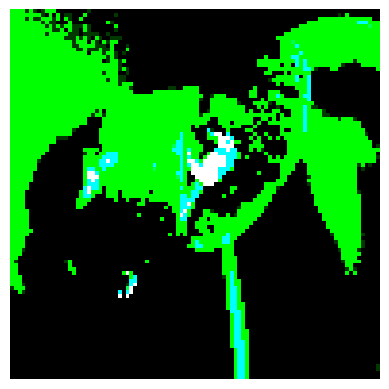

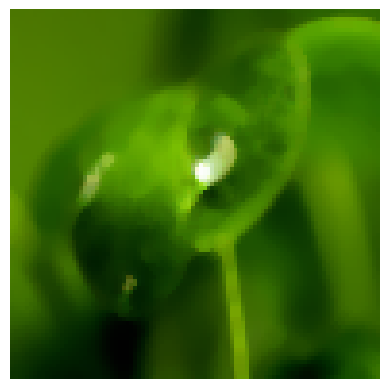

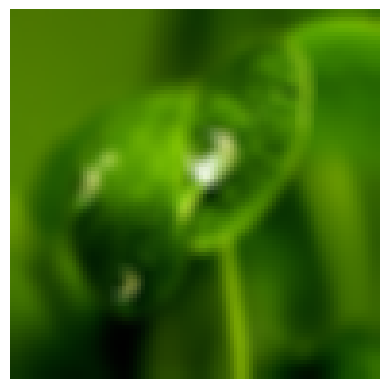

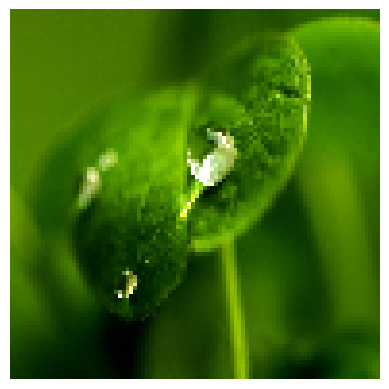

In [53]:
import matplotlib.pyplot as plt

#preprocessed_image = preprocess_input(x_process[0])
#blurred_image = cv2.medianBlur(x[0], 5)

def visualize_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
#visualize_image(preprocessed_image)
visualize_image(x_process[0])
visualize_image(x_median[0])
visualize_image(x_gaus[0])
visualize_image(x[0])

In [54]:
x_process = np.array(x_process)
x_gaus = np.array(x_gaus)

In [ ]:
IMG_SIZE = 96

resize_and_rescale = keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


x_resize= resize_and_rescale(x)


In [55]:
class_images = {class_name: [] for class_name in class_names}

for image, class_label in all_data:
    class_images[class_names[class_label]].append(image)

class_0 = np.array(class_images['dew'])
class_1 = np.array(class_images['fogsmog'])
class_2  = np.array(class_images['frost'])
class_3 = np.array(class_images['glaze'])
class_4 = np.array(class_images['hail'])
class_5 = np.array(class_images['lightning'])
class_6 = np.array(class_images['rain'])
class_7 = np.array(class_images['rainbow'])
class_8 = np.array(class_images['rime'])
class_9 = np.array(class_images['sandstorm'])
class_10 = np.array(class_images['snow'])


print(len(class_0))
print(len(class_1))
print(len(class_2))
print(len(class_3))

697
849
474
638


In [56]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

augmented_images_0 = []  
augmented_images_1 = []
augmented_images_2 = []
augmented_images_3 = []
augmented_images_4 = []
augmented_images_5 = []
augmented_images_6 = []
augmented_images_7 = []
augmented_images_8 = []
augmented_images_9 = []
augmented_images_10 = []


for i in range(2):
     # Append augmented images to the new array
    class0_augment = data_augmentation(class_0)
    augmented_images_0.extend(class0_augment) 
    
    class1_augment = data_augmentation(class_1)
    augmented_images_1.extend(class1_augment)
    
    class3_augment = data_augmentation(class_3)
    augmented_images_3.extend(class3_augment)
    
    class9_augment = data_augmentation(class_9)
    augmented_images_9.extend(class9_augment)
    
    class10_augment = data_augmentation(class_10)
    augmented_images_10.extend(class10_augment)
    
    class4_augment = data_augmentation(class_4)
    augmented_images_4.extend(class4_augment)
    
    class6_augment = data_augmentation(class_6)
    augmented_images_6.extend(class6_augment)
    
    
    
for i in range(3):    
    class2_augment = data_augmentation(class_2)
    augmented_images_2.extend(class2_augment)
    
    class5_augment = data_augmentation(class_5)
    augmented_images_5.extend(class5_augment)
    

    
for i in range(5):
    class7_augment = data_augmentation(class_7)
    augmented_images_7.extend(class7_augment)
    

print('0: ', len(augmented_images_0))
print('1: ', len(augmented_images_1))
print('2: ', len(augmented_images_2))
print('3: ',len(augmented_images_3))
print('4: ',len(augmented_images_4))
print('5: ',len(augmented_images_5))
print('6: ',len(augmented_images_6))
print('7: ',len(augmented_images_7))
print('8: ',len(class_8))
print('9: ',len(augmented_images_9))
print('10: ',len(augmented_images_10))

0:  1394
1:  1698
2:  1422
3:  1276
4:  1180
5:  1128
6:  1050
7:  1155
8:  1159
9:  1382
10:  1238


In [57]:
all_augmented_data = []

all_augmented_data.extend(augmented_images_0)
all_augmented_data.extend(augmented_images_1)
all_augmented_data.extend(augmented_images_2)
all_augmented_data.extend(augmented_images_3)
all_augmented_data.extend(augmented_images_4)
all_augmented_data.extend(augmented_images_5)
all_augmented_data.extend(augmented_images_6)
all_augmented_data.extend(augmented_images_7)
all_augmented_data.extend(augmented_images_8)
all_augmented_data.extend(augmented_images_9)
all_augmented_data.extend(augmented_images_10)

print(len(all_augmented_data))

12923


In [58]:
y_aug = []

for i in range(len(augmented_images_0)):
    y_aug.append(0)
    
for i in range(len(augmented_images_1)):
    y_aug.append(1)
    
for i in range(len(augmented_images_2)):
    y_aug.append(2)    
    
for i in range(len(augmented_images_3)):
    y_aug.append(3)    
    
for i in range(len(augmented_images_4)):
    y_aug.append(4)    
    
for i in range(len(augmented_images_5)):
    y_aug.append(5)    
    
for i in range(len(augmented_images_6)):
    y_aug.append(6)    
    
for i in range(len(augmented_images_7)):
    y_aug.append(7)
    
for i in range(len(augmented_images_8)):
    y_aug.append(8)

for i in range(len(augmented_images_9)):
    y_aug.append(9)
    
for i in range(len(augmented_images_10)):
    y_aug.append(10)       
    
print(len(y_aug))

12923


In [59]:
all_augmented_data = np.array(all_augmented_data)
y_aug = np.array(y_aug)

In [60]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(all_augmented_data, y_aug, test_size=0.2, random_state=42, shuffle=True)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_gaus, y, test_size=0.2, random_state=42, shuffle=True)

In [62]:
def res50Built(Train, labelTrain, Test, labelTest, imageDim):
    global res_model
    epochs = 5
    num_classes = 11
    res_model = Sequential()
    pretrained_model = tf.keras.applications.ResNet50(include_top=False, 
                                                input_shape = (96, 96, 3),
                                                pooling='max' , 
                                                classes=11,
                                                weights='imagenet')
    for layer in pretrained_model.layers:
      layer.trainable=False

    res_model.add(pretrained_model)
    #res_model.add(Flatten())
    #res_model.add(Dense(512, activation='relu'))
    #res_model.add(Dense(256, activation='relu'))
    res_model.add(Dense(128, activation='relu'))
    res_model.add(Dense(num_classes, activation='softmax'))
    
    
    adam = Adam(learning_rate=0.0005)
    res_model.compile(
        optimizer=adam,
        loss='categorical_crossentropy',
        metrics=[tf.keras.metrics.AUC(name="accuracy"), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
    )
    res_model.fit(
        Train,
        to_categorical(labelTrain),
        epochs=epochs,
        batch_size=32,
        validation_data=(Test, to_categorical(labelTest)),
    )

    #model.summary()

    predictions = res_model.predict(Test)

    return predictions

In [63]:
resnet_predictions = res50Built(x_train2, y_train2, x_test2, y_test2, 3)

Epoch 1/5
324/324 [==============================] - 68s 200ms/step - loss: 0.7773 - accuracy: 0.9664 - precision_5: 0.8122 - recall_5: 0.7492 - val_loss: 0.3874 - val_accuracy: 0.9875 - val_precision_5: 0.8981 - val_recall_5: 0.8557
Epoch 2/5
324/324 [==============================] - 69s 213ms/step - loss: 0.2001 - accuracy: 0.9965 - precision_5: 0.9478 - recall_5: 0.9262 - val_loss: 0.2516 - val_accuracy: 0.9939 - val_precision_5: 0.9358 - val_recall_5: 0.9137
Epoch 3/5
324/324 [==============================] - 73s 225ms/step - loss: 0.0836 - accuracy: 0.9991 - precision_5: 0.9806 - recall_5: 0.9728 - val_loss: 0.1840 - val_accuracy: 0.9949 - val_precision_5: 0.9606 - val_recall_5: 0.9443
Epoch 4/5
324/324 [==============================] - 74s 227ms/step - loss: 0.0362 - accuracy: 0.9998 - precision_5: 0.9931 - recall_5: 0.9910 - val_loss: 0.1480 - val_accuracy: 0.9942 - val_precision_5: 0.9712 - val_recall_5: 0.9648
Epoch 5/5
81/81 [==============================] - 16s 183ms/ste

In [64]:
predictions_norm = np.argmax(resnet_predictions, axis=1)
predictions_norm

array([5, 3, 7, ..., 1, 4, 2], dtype=int64)

In [65]:
precision = precision_score(y_test2, predictions_norm, average='macro')
recall = recall_score(y_test2, predictions_norm, average='macro')
fscore = f1_score(y_test2, predictions_norm, average='macro')
accuracy = accuracy_score(y_test2, predictions_norm)
cm = confusion_matrix(y_test2, predictions_norm)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print("f1 score: ", fscore)
print('cm: ', cm)

accuracy:  0.9709864603481625
precision:  0.9716053446651985
recall:  0.9717570439838372
f1 score:  0.9716632005922184
cm:  [[274   0   0   4   2   0   0   0   0   2]
 [  0 347   0   2   0   4   0   0   6   2]
 [  0   0 284   0   2   0   0   0   0   3]
 [  4   0   0 225   0   0   0   0   0   8]
 [  0   0   0   2 230   0   0   0   0   2]
 [  0   3   0   0   0 228   0   0   0   0]
 [  2   2   0   0   0   0 213   0   0   4]
 [  0   0   0   0   0   0   0 216   0   0]
 [  0   5   0   0   0   0   0   0 248   0]
 [  0   4   0   4   0   0   8   0   0 245]]


In [66]:
import os.path
if os.path.isfile('models/res_model2.h5') is False:
    res_model.save('models/res_model2.h5')

In [ ]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget, QLabel, QFileDialog
from PyQt5.QtGui import QPixmap
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

class MainWindow(QMainWindow):
    
    class_names = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning' , 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
    #folder_names = ["0",     "1",      "2",     "3",    "4",      "5",        "6",      "7",      "8",      "9",      "10" ] 
    
    def __init__(self):
        super().__init__()

        self.model = load_model('models/res_model2.h5')

        self.initUI()

    def initUI(self):
        self.setWindowTitle('Image Classifier')

        self.layout = QVBoxLayout()

        self.label = QLabel(self)
        self.layout.addWidget(self.label)

        self.predicted_label = QLabel(self)
        self.layout.addWidget(self.predicted_label)

        self.btn = QPushButton('Load Image', self)
        self.layout.addWidget(self.btn)
        self.btn.clicked.connect(self.loadImage)

        self.btn_predict = QPushButton('Predict', self)
        self.layout.addWidget(self.btn_predict)
        self.btn_predict.clicked.connect(self.predict)

        widget = QWidget()
        widget.setLayout(self.layout)
        self.setCentralWidget(widget)

    def loadImage(self):
        self.fname = QFileDialog.getOpenFileName(self, 'Open file', '/home')
        self.image_path = self.fname[0]
        self.pixmap = QPixmap(self.image_path)
        self.label.setPixmap(self.pixmap)
        self.label.setScaledContents(True)

    def predict(self):
        img = load_img(self.image_path, target_size=(96, 96))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        prediction = self.model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=-1)
        predicted_class_name = self.class_names[int(predicted_class)]
        self.predicted_label.setText(f'Predicted class is {predicted_class_name}')
        
    def MapPrediction(self, prediction):
        class_name
        

if __name__ == '__main__':
    import sys
    app = QApplication(sys.argv)
    win = MainWindow()
    win.show()
    sys.exit(app.exec_())


1/1 [==============================] - 1s 1s/step
